In [1]:
!pip install pytrends

In [8]:
import pandas as pd
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import time

Trending_topics = TrendReq(hl='en-US', tz=360)

In [9]:
kw_list=["Cloud Computing"]
Trending_topics.build_payload(kw_list,cat=0, timeframe='today 12-m')
time.sleep(5) # Wait for 5 seconds


In [11]:
data = Trending_topics.interest_over_time()
data = data.sort_values(by="Cloud Computing", ascending=False)
data = data.head(10)
print(data)

            Cloud Computing  isPartial
date                                  
2023-12-03              100      False
2023-12-10               97      False
2023-11-26               88      False
2024-01-28               88      False
2023-09-24               86      False
2023-10-08               85      False
2023-11-19               84      False
2023-12-17               84      False
2024-01-21               84      False
2023-10-29               83      False


In [12]:
kw_list = ["Cloud Computing"]
Trending_topics.build_payload(kw_list, cat=0, timeframe='2022-01-01 2022-02-01', geo='', gprop='')
data = Trending_topics.interest_over_time()
data = data.sort_values(by="Cloud Computing", ascending=False)
data = data.head(10)
print(data)

            Cloud Computing  isPartial
date                                  
2022-01-24              100      False
2022-01-04               82      False
2022-01-13               76      False
2022-01-16               49      False
2022-01-12               40      False
2022-01-28               39      False
2022-02-01               39      False
2022-01-19               38      False
2022-01-20               38      False
2022-01-25               38      False


In [16]:
data = Trending_topics.interest_by_region()
data = data.sort_values(by="Cloud Computing", ascending=False)
data = data.head(10)
print(data)

           Cloud Computing
geoName                   
Ethiopia               100
Cameroon                44
Zimbabwe                41
India                   40
Uganda                  31
Sri Lanka               30
Nepal                   29
Pakistan                25
Ghana                   24
Tanzania                22


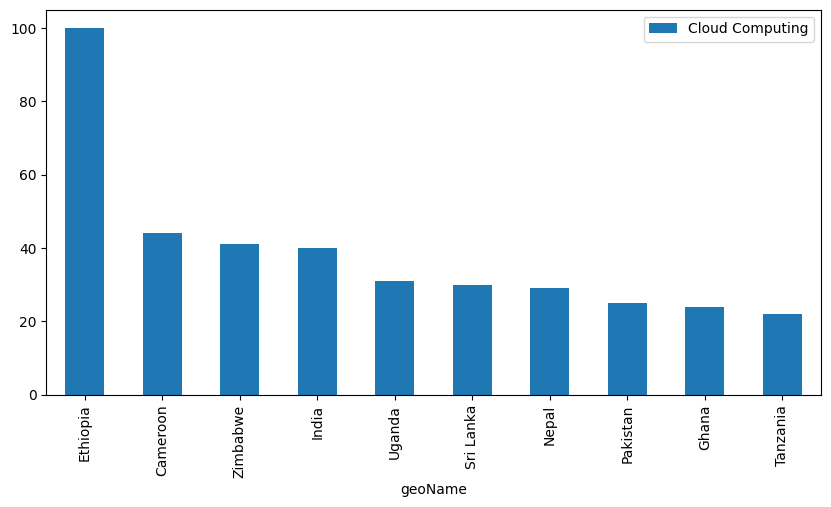

In [17]:
data.reset_index().plot(x="geoName", y="Cloud Computing", figsize=(10,5), kind='bar')
plt.style.use('fivethirtyeight')
plt.show()

In [29]:
df = Trending_topics.top_charts(2020, hl='en-US', tz=300, geo='GLOBAL')

df.head(10)

,title,exploreQuery
0,Coronavirus,
1,Election results,
2,Kobe Bryant,
3,Zoom,
4,IPL,
5,India vs New Zealand,
6,Coronavirus update,
7,Coronavirus symptoms,
8,Joe Biden,
9,Google Classroom,


In [30]:
try:
  Trending_topics.build_payload(kw_list=["Cloud Computing"])
  related_queries = Trending_topics.related_queries()
  related_queries.values()
except(KeyError, IndexError):
  print("No related queries found for 'Cloud Computing'")

No related queries found for 'Cloud Computing'


In [36]:
keywords = Trending_topics.suggestions(
    keyword='Anime')
df = pd.DataFrame(keywords)
df.drop(columns = 'mid')

,title,type
0,Anime,Television genre
1,Anime,"Sushi restaurant in Saint Petersburg, Russia"
2,Animation,Film format
3,TSF Monogatari,Book by Shindo L
4,Adult Coloring Books,Visual artist
